In [16]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from Instruments.hp816x_instr import hp816x

class sweepobj(object):
    
    def __init__(self,LMS, data_dir=os.getcwd()):
        self.LMS = LMS      
        self.data_dir = data_dir
        print(self.data_dir)   
        
    def setup_LMS(self):
        """Setup the Lightwave Measurement System for use."""
        self.LMS.setAutorangeAll()
    
    def wvl_sweep(self, wvl_start=1540, wvl_stop=1570, wvl_step=0.02, plot = True, filename=None):
        """Perform a wavelength sweep over the specified range."""
        
        # Init Instrument
        self.LMS.sweepUnit = 'dBm'
        self.LMS.sweepLaserOutput = 'highpower' # lowsse ou highpower
        self.LMS.sweepStartWvl = wvl_start * 1e-9
        self.LMS.sweepStopWvl = wvl_stop * 1e-9
        self.LMS.sweepStepWvl = wvl_step * 1e-9
        self.LMS.sweepInitialRange = 0
        self.LMS.sweepRangeDecrement = 20
        self.LMS.setPWMPowerUnit(2, 0, 'dBm')

        #Sweep
        wvl_sweep,pow_sweep = self.LMS.sweep()

        # Turn off the laser
        self.setup_LMS()
        
        # Plot the results
        f = plt.figure()
        if plot == True:
            plt.plot(wvl_sweep*1e9,pow_sweep.transpose()[0])
        if plot:
            plt.xlabel('Wavelength (nm)')
            plt.ylabel('Power (dBm)')
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.show()
        
        # Save the results
        if filename == None:
            filename = raw_input("Enter the name of the file:")
        if not(filename==""):
            complete_name = self.data_dir + '\\' + filename 
            np.savetxt(complete_name + ".txt", (wvl_sweep,pow_sweep.transpose()[0]))
            f.savefig(complete_name + ".pdf")

# Script for a single bias sweep WORKS
def sweep_bias_shape(wvl_start=1545, 
                     wvl_stop=1555, 
                     wvl_step=0.02, 
                     DCsource=None, 
                     bias_min=0, 
                     bias_max=0.5, 
                     bias_points=2, 
                     dirname = "\\datatest\\"):
    """"""
    
    #  Location to save the data
    data_dir = os.getcwd() + dirname

    # Initialize the DC source
    DCsource.connect()

    # Initialize the laser source
    LMS = hp816x()
    if LMS.connected == True:
        LMS.disconnect()
    else:
        LMS.connect('GPIB0::20::INSTR')

    so = sweepobj(LMS, 'C:\Users\Lab\Documents\MRM_QAM\Data\Jan16')
    
    # Sweep the bias
    bias_testpoints = np.linspace(bias_min,bias_max,bias_points).tolist()
    DCsource.output_on()
    for k in bias_testpoints: # For each bias value
        DCsource.source_voltage(k)
        #time.sleep(0.1)
        
                
        filename = "V=" + '{:.3f}'.format(k).replace(".","_") + ".txt"
        
        # Perform the sweep
        so.wvl_sweep(wvl_start,wvl_stop,wvl_step, filename=filename)

    
    # Turn DC source Off
    DCsource.output_off()
    LMS.disconnect()

The mainframe is: HP8164A
Connected to the laser
C:\Users\Lab\Documents\MRM_QAM\Data\Jan16
Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


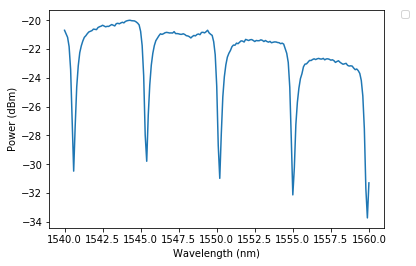

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


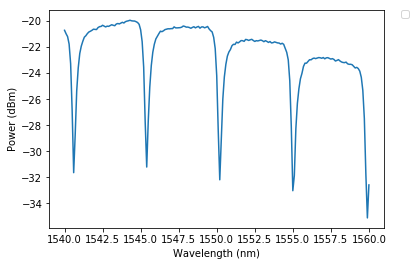

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


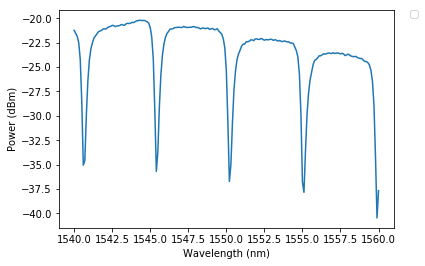

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


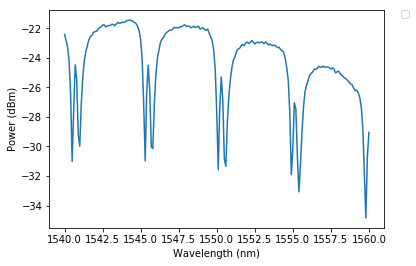

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


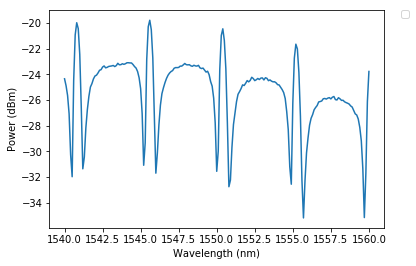

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


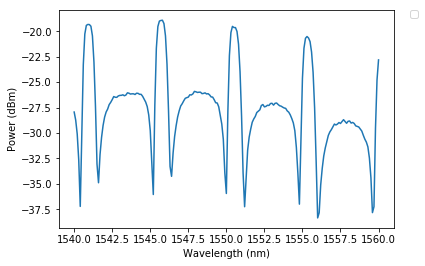

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


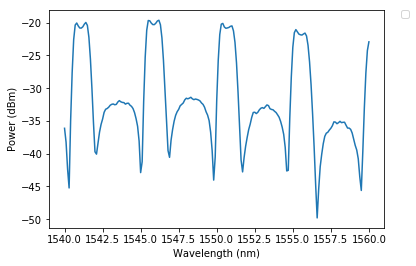

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


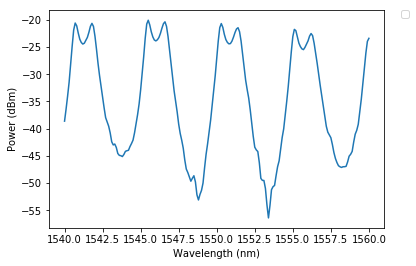

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


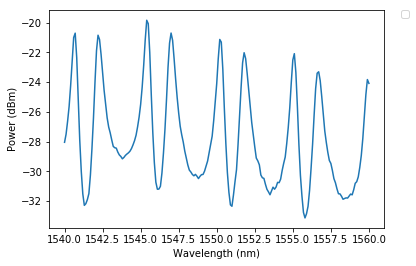

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


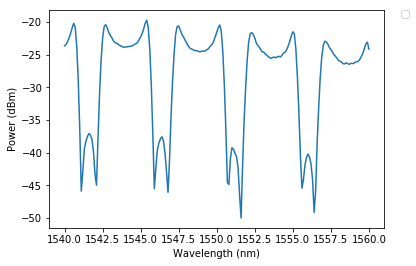

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


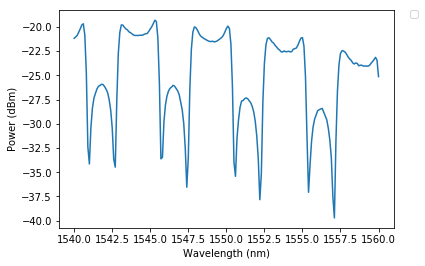

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


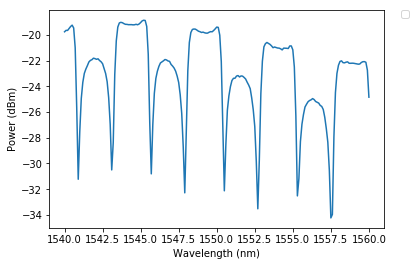

Total number of datapoints: 201
Stitch number: 1
Sweeping from 1540.0 nm to 1560.0 nm


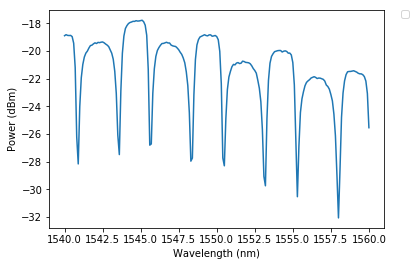

Disconnected from the laser


In [20]:
from Instruments.Keithley_2612B import Keithley_2612B
from Instruments.hp816x_instr import hp816x

sweep_bias_shape(wvl_start=1540, 
                 wvl_stop=1560, 
                 wvl_step=0.1, 
                 DCsource=Keithley_2612B(0, 26, 'b'), 
                 bias_min=0, 
                 bias_max=-6, 
                 bias_points=13, 
                 dirname = "\\datatest\\")

In [ ]:
LMS = hp816x()
if LMS.connected == True:
    LMS.disconnect()
else:
    LMS.connect('GPIB0::20::INSTR')

so = sweepobj(LMS, 'C:\Users\Lab\Documents\MRM_QAM\Data\dec7')
so.wvl_sweep(1545,1555,0.02)

LMS.disconnect()

In [22]:
LMS.disconnect()

InstrumentError: NULL pointer detected

In [ ]:
print reduce(lambda x, y: x + y, l) / len(l)